# Tools for Analyzing Time Series of Satellite Imagery (TATSSI)

In [1]:
%autosave 0

from helpers import utils

# TATSSI Time Series Generator
from TATSSI.time_series.generator import Generator

Autosave disabled


INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: /python/miniconda3/envs/satif/lib/R
INFO:rpy2.situation:R library path: 
INFO:rpy2.situation:LD_LIBRARY_PATH: 
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save
INFO:rpy2.rinterface_lib.embedded:R is already initialized. No need to initialize.


In [2]:
# Set data directory
DataDir = '/home/glopez/Projects/TATSSI/data/VNP13A3.001'
# Set product, it must match product name in TATSSI catalogue
product, version = 'VNP13A3', '001'

Using these setings now we can generate the time series:

In [3]:
# Create the time series generator object
tsg = Generator(source_dir = DataDir, product=product,
                version=version, data_format='h5')

## Explore time series

TATSSI will load the time series into a time series object ```ts``` that contain two attributes:
- ```data```
 - An xarray dataset with variables for all layers in the specified product
 
- ```qa```
 - A Python named tuple where every field is the QA layer and the attributes of every QA layer are the decoded QA fields

In [4]:
# Load time series data!
ts = tsg.load_time_series()

In [5]:
# Data
ts.data

<xarray.Dataset>
Dimensions:                               (time: 17, latitude: 1200,
                                           longitude: 1200)
Coordinates:
  * time                                  (time) datetime64[ns] 2018-11-01 .....
  * latitude                              (latitude) float64 3.335e+06 ... 2....
  * longitude                             (longitude) float64 -1.112e+07 ... ...
Data variables: (12/15)
    _1_km_monthly_EVI                     (time, latitude, longitude) int16 ...
    _1_km_monthly_EVI2                    (time, latitude, longitude) int16 ...
    _1_km_monthly_NDVI                    (time, latitude, longitude) int16 ...
    _1_km_monthly_NIR_reflectance         (time, latitude, longitude) int16 ...
    _1_km_monthly_SWIR1_reflectance       (time, latitude, longitude) int16 ...
    _1_km_monthly_SWIR2_reflectance       (time, latitude, longitude) int16 ...
    ...                                    ...
    _1_km_monthly_green_reflectance       (time, latitude, longitude) int16 ...
    _1_km_monthly_pixel_reliability       (time, latitude, longitude) uint8 ...
    _1_km_monthly_red_reflectance         (time, latitude, longitude) int16 ...
    _1_km_monthly_relative_azimuth_angle  (time, latitude, longitude) int16 ...
    _1_km_monthly_sun_zenith_angle        (time, latitude, longitude) int16 ...
    _1_km_monthly_view_zenith_angle       (time, latitude, longitude) int16 ...

In [6]:
# QA layers
ts.qa._fields

('qa_1_km_monthly_VI_Quality', 'qa_1_km_monthly_pixel_reliability')

## Create on-the-fly composites

In [19]:
# Seasonal composites - 3MS - three months at the start of the month - Max EVI
bimonthly_mean_EVI = ts.data._1_km_monthly_EVI.resample(time='2MS').max('time')

In [20]:
# What's in the trimonthly composite
bimonthly_mean_EVI

<xarray.DataArray '_1_km_monthly_EVI' (time: 9, latitude: 1200, longitude: 1200)>
array([[[  1995,   1810,   1940, ...,   1265,   1373,   1317],
        [  1694,   1653,   1610, ...,   1347,   1427,   1435],
        [  1725,   1347,   1629, ...,   1385,   1483,   1533],
        ...,
        [-15000, -15000, -15000, ..., -15000, -15000, -15000],
        [-15000, -15000, -15000, ..., -15000, -15000, -15000],
        [-15000, -15000, -15000, ..., -15000, -15000, -15000]],

       [[  2198,   2072,   2294, ...,   1002,   1012,   1008],
        [  2170,   1934,   1853, ...,   1067,   1032,   1256],
        [  1879,   1975,   2103, ...,   1080,   1130,   1292],
        ...,
        [-15000, -15000, -15000, ..., -15000, -15000, -15000],
        [-15000, -15000, -15000, ..., -15000, -15000, -15000],
        [-15000, -15000, -15000, ..., -15000, -15000, -15000]],

       [[  2136,   1950,   2030, ...,   1190,   1213,   1213],
        [  2062,   2084,   2043, ...,   1195,   1213,   1302],
        [  2000,   2109,   2041, ...,   1228,   1321,   1347],
        ...,
...
        [-15000, -15000, -15000, ..., -15000, -15000, -15000],
        [-15000, -15000, -15000, ..., -15000, -15000, -15000],
        [-15000, -15000, -15000, ..., -15000, -15000, -15000]],

       [[  1560,   1544,   1715, ...,   1207,   1228,   1249],
        [  1551,   1500,   1428, ...,   1260,   1309,   1339],
        [  1436,   1437,   1460, ...,   1289,   1368,   1413],
        ...,
        [-15000, -15000, -15000, ..., -15000, -15000, -15000],
        [-15000, -15000, -15000, ..., -15000, -15000, -15000],
        [-15000, -15000, -15000, ..., -15000, -15000, -15000]],

       [[  1446,   1347,   1457, ...,   1123,   1160,   1170],
        [  1404,   1369,   1286, ...,   1203,   1211,   1233],
        [  1301,   1377,   1278, ...,   1206,   1239,   1239],
        ...,
        [-15000, -15000, -15000, ..., -15000, -15000, -15000],
        [-15000, -15000, -15000, ..., -15000, -15000, -15000],
        [-15000, -15000, -15000, ..., -15000, -15000, -15000]]],
      dtype=int16)
Coordinates:
  * latitude   (latitude) float64 3.335e+06 3.334e+06 ... 2.225e+06 2.224e+06
  * longitude  (longitude) float64 -1.112e+07 -1.112e+07 ... -1.001e+07
  * time       (time) datetime64[ns] 2018-11-01 2019-01-01 ... 2020-03-01
Attributes:
    transform:   (926.6254330558348, 0.0, -11119505.196667, 0.0, -926.6254330...
    crs:         +proj=sinu +lon_0=0 +x_0=0 +y_0=0 +R=6371007 +units=m +no_de...
    res:         (926.6254330558348, 926.6254330558332)
    is_tiled:    1
    nodatavals:  (-15000.0, -15000.0, -15000.0, -15000.0, -15000.0, -15000.0,...
    scales:      (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
    offsets:     (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

In [21]:
import matplotlib.pyplot as plt

# Some help on how to access dimension on an xarray
# http://xarray.pydata.org/en/stable/indexing.html

# Plot January composite
p = bimonthly_mean_EVI.sel(time='2019-05-01T00').plot(cmap='Greys_r')
# Keep square aspect
p.axes.set_aspect('equal')
# Show plot
plt.show()

<IPython.core.display.Javascript object>

In [10]:
# Create a 3-month composite
three_month_mean_EVI = ts.data._1_km_monthly_EVI.resample(time='2MS').mean('time')

In [11]:
three_month_mean_EVI.time

<xarray.DataArray 'time' (time: 9)>
array(['2018-11-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-11-01 2019-01-01 ... 2020-03-01

<IPython.core.display.Javascript object>


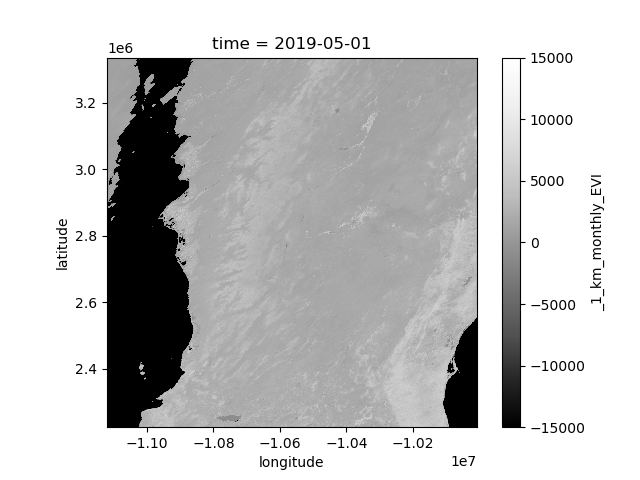

In [16]:
# Some help on how to access dimension on an xarray
# http://xarray.pydata.org/en/stable/indexing.html

# Plot January composite
p = three_month_mean_EVI.sel(time='2019-05-01').plot(cmap='Greys_r')
# Keep square aspect
p.axes.set_aspect('equal')
# Show plot
plt.show()

In [13]:
# Synthetic daily EVI -- D is day
daily_EVI = ts.data._1_km_monthly_EVI.resample(time='D').ffill()

In [14]:
daily_EVI

<xarray.DataArray '_1_km_monthly_EVI' (time: 487, latitude: 1200,
                                       longitude: 1200)>
[701280000 values with dtype=int16]
Coordinates:
  * time       (time) datetime64[ns] 2018-11-01 2018-11-02 ... 2020-03-01
  * latitude   (latitude) float64 3.335e+06 3.334e+06 ... 2.225e+06 2.224e+06
  * longitude  (longitude) float64 -1.112e+07 -1.112e+07 ... -1.001e+07
Attributes:
    transform:   (926.6254330558348, 0.0, -11119505.196667, 0.0, -926.6254330...
    crs:         +proj=sinu +lon_0=0 +x_0=0 +y_0=0 +R=6371007 +units=m +no_de...
    res:         (926.6254330558348, 926.6254330558332)
    is_tiled:    1
    nodatavals:  (-15000.0, -15000.0, -15000.0, -15000.0, -15000.0, -15000.0,...
    scales:      (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
    offsets:     (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

<IPython.core.display.Javascript object>


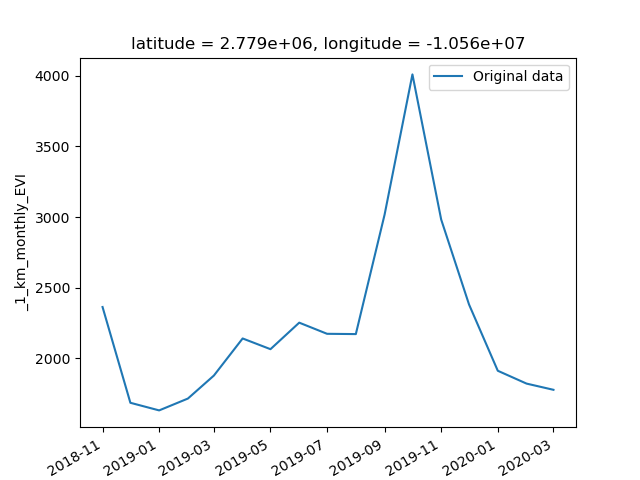

In [15]:
# Plot a single pixel
# Original data
ts.data._1_km_monthly_EVI[:,600,600].plot(label='Original data')

# "Daily" data
#daily_EVI[:,600,600].plot(label='Synthetic daily data')
plt.legend()
plt.show()